In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ressources.csv')
df.head()

,cpu_usage,memory_usage,disk_usage,task_duration
0,61,23,98,271
1,24,18,80,456
2,81,99,18,280
3,70,62,97,286
4,30,11,10,192


In [5]:
# Variables explicatives (X) et cible (y)
X = df[['cpu_usage', 'memory_usage', 'disk_usage']]
y = df['task_duration']

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données (important pour les réseaux de neurones)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Création du modèle de réseau de neurones
model = Sequential()

# Ajout des couches
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # 1ère couche cachée avec 32 neurones
model.add(Dense(16, activation='relu'))  # 2ème couche cachée avec 16 neurones
model.add(Dense(1, activation='linear'))  # Couche de sortie pour la régression

# Compilation du modèle
model.compile(optimizer='adam', loss='mse')

# Résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Entraînement du modèle
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=10)

Epoch 1/100
4/4 [==============================] - 1s 118ms/step - loss: 86354.9609 - val_loss: 88830.8516
Epoch 2/100
4/4 [==============================] - 0s 24ms/step - loss: 86294.9844 - val_loss: 88787.0781
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: 86234.0703 - val_loss: 88741.1953
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 86166.1484 - val_loss: 88692.4453
Epoch 5/100
4/4 [==============================] - 0s 26ms/step - loss: 86094.8594 - val_loss: 88640.3672
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 86022.4922 - val_loss: 88585.3828
Epoch 7/100
4/4 [==============================] - 0s 24ms/step - loss: 85949.4453 - val_loss: 88526.9609
Epoch 8/100
4/4 [==============================] - 0s 24ms/step - loss: 85871.1641 - val_loss: 88465.2812
Epoch 9/100
4/4 [==============================] - 0s 25ms/step - loss: 85782.0547 - val_loss: 88400.2812
Epoch 10/100
4/4 [===========================

4/4 [==============================] - 0s 23ms/step - loss: 49554.0781 - val_loss: 61561.6758
Epoch 78/100
4/4 [==============================] - 0s 21ms/step - loss: 48553.6914 - val_loss: 60797.8008
Epoch 79/100
4/4 [==============================] - 0s 20ms/step - loss: 47520.9883 - val_loss: 60031.7461
Epoch 80/100
4/4 [==============================] - 0s 23ms/step - loss: 46458.6445 - val_loss: 59285.4336
Epoch 81/100
4/4 [==============================] - 0s 24ms/step - loss: 45490.4805 - val_loss: 58525.5156
Epoch 82/100
4/4 [==============================] - 0s 22ms/step - loss: 44503.1406 - val_loss: 57766.7422
Epoch 83/100
4/4 [==============================] - 0s 20ms/step - loss: 43462.9062 - val_loss: 57029.3672
Epoch 84/100
4/4 [==============================] - 0s 20ms/step - loss: 42463.3086 - val_loss: 56281.9805
Epoch 85/100
4/4 [==============================] - 0s 20ms/step - loss: 41487.1523 - val_loss: 55565.1328
Epoch 86/100
4/4 [==============================] 

In [8]:
# Prédictions sur les données de test
y_pred = model.predict(X_test_scaled)

1/1 [==============================] - 0s 121ms/step


In [9]:
# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R²): {r2}")

Mean Squared Error (MSE): 45312.88045669932
Coefficient of Determination (R²): -1.6986629962921143


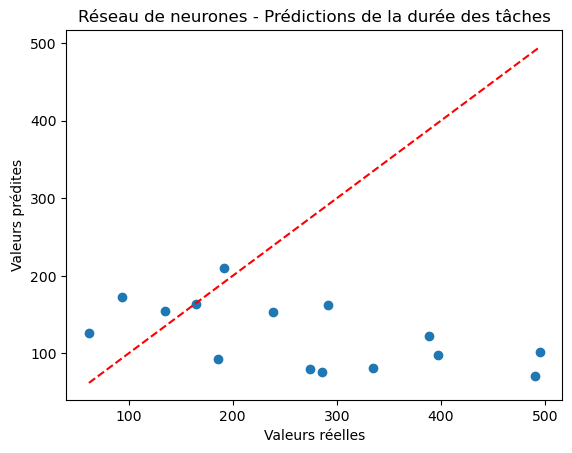

In [11]:
# Tracé des valeurs réelles vs prédites
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Réseau de neurones - Prédictions de la durée des tâches')
plt.show()

In [12]:
# Différentes configurations de batch size et d'époques
batch_sizes = [8, 16, 32]
epochs_list = [50, 100, 200]

# Stocker les résultats pour comparaison
results = []

for batch_size in batch_sizes:
    for epochs in epochs_list:
        # Création du modèle de réseau de neurones
        model = Sequential()
        model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='linear'))

        # Compilation du modèle
        model.compile(optimizer='adam', loss='mse')

        # Entraînement du modèle avec batch_size et epochs variables
        model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=epochs, batch_size=batch_size, verbose=0)

        # Prédictions et évaluation
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Stockage des résultats
        results.append((batch_size, epochs, mse, r2))
        print(f"Batch size: {batch_size}, Epochs: {epochs} - MSE: {mse:.4f}, R²: {r2:.4f}")

# Affichage des résultats dans un DataFrame
results_df = pd.DataFrame(results, columns=['Batch Size', 'Epochs', 'MSE', 'R²'])
results_df

1/1 [==============================] - 0s 127ms/step
Batch size: 8, Epochs: 50 - MSE: 77106.4164, R²: -3.5922
1/1 [==============================] - 0s 136ms/step
Batch size: 8, Epochs: 100 - MSE: 44735.1535, R²: -1.6643
1/1 [==============================] - 0s 130ms/step
Batch size: 8, Epochs: 200 - MSE: 27321.9192, R²: -0.6272
1/1 [==============================] - 0s 122ms/step
Batch size: 16, Epochs: 50 - MSE: 86450.3106, R²: -4.1487
1/1 [==============================] - 0s 124ms/step
Batch size: 16, Epochs: 100 - MSE: 62435.1248, R²: -2.7184
1/1 [==============================] - 0s 130ms/step
Batch size: 16, Epochs: 200 - MSE: 32693.4511, R²: -0.9471
1/1 [==============================] - 0s 118ms/step
Batch size: 32, Epochs: 50 - MSE: 87074.3543, R²: -4.1858
1/1 [==============================] - 0s 124ms/step
Batch size: 32, Epochs: 100 - MSE: 84858.1157, R²: -4.0538
1/1 [==============================] - 0s 118ms/step
Batch size: 32, Epochs: 200 - MSE: 43563.4943, R²: -1.594

,Batch Size,Epochs,MSE,R²
0,8,50,77106.416393,-3.592166
1,8,100,44735.153508,-1.664256
2,8,200,27321.919157,-0.627190
3,16,50,86450.310639,-4.148653
4,16,100,62435.124800,-2.718399
5,16,200,32693.451115,-0.947098
6,32,50,87074.354263,-4.185818
7,32,100,84858.115692,-4.053827
8,32,200,43563.494263,-1.594477


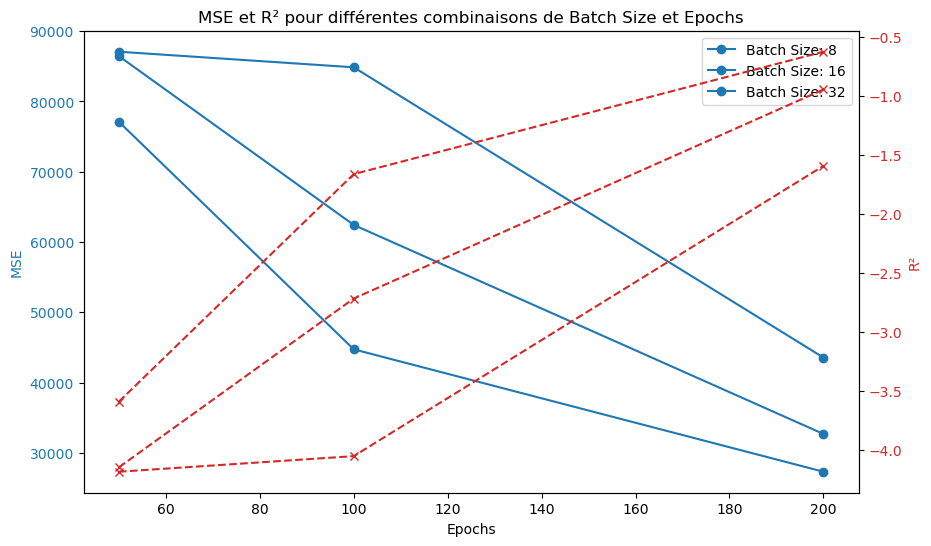

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Données des résultats
data = {
    'Batch Size': [8, 8, 8, 16, 16, 16, 32, 32, 32],
    'Epochs': [50, 100, 200, 50, 100, 200, 50, 100, 200],
    'MSE': [77106.416393, 44735.153508, 27321.919157, 86450.310639, 62435.124800, 32693.451115, 
            87074.354263, 84858.115692, 43563.494263],
    'R2': [-3.592166, -1.664256, -0.627190, -4.148653, -2.718399, -0.947098, 
           -4.185818, -4.053827, -1.594477]
}

# Création du DataFrame
results_df = pd.DataFrame(data)

# Tracé des courbes MSE et R² pour différentes combinaisons
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracé de la MSE
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE', color='tab:blue')
for batch_size in results_df['Batch Size'].unique():
    df_batch = results_df[results_df['Batch Size'] == batch_size]
    ax1.plot(df_batch['Epochs'], df_batch['MSE'], marker='o', label=f'Batch Size: {batch_size}', color='tab:blue')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper right')

# Création d'une seconde échelle de y pour R²
ax2 = ax1.twinx()
ax2.set_ylabel('R²', color='tab:red')
for batch_size in results_df['Batch Size'].unique():
    df_batch = results_df[results_df['Batch Size'] == batch_size]
    ax2.plot(df_batch['Epochs'], df_batch['R2'], marker='x', linestyle='--', label=f'R² - Batch Size: {batch_size}', color='tab:red')

ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('MSE et R² pour différentes combinaisons de Batch Size et Epochs')
plt.show()
